In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

In [3]:
import seaborn as sns
sns.set(color_codes=True)

# Preprocess

In [4]:
targetDir = "../data/output/Result1/Result/"
speedDir = "../data/output/Result1/Speed/"
brakeDir = "../data/output/Result1/Brake/"
accelDIr = "../data/output/Result1/Accel/"
accelOffDir = "../data/output/Result1/AccelOff/"
turnRightDir = "../data/output/Result1/TurnRight/"
turnLeftDir = "../data/output/Result1/TurnLeft/"
manyCarDir = "../data/output/Result1/ManyCars/"
middleCarDir = "../data/output/Result1/MiddleCars/"
lessCarDir = "../data/output/Result1/LessCars/"
afternoonSunMax = "../data/output/Result1/AfternoonSunMax/"
afternoonSunMiddle = "../data/output/Result1/AfternoonSunMiddle/"
afternoonSunMin = "../data/output/Result1/AfternoonSunMin/"
cloudMax = "../data/output/Result1/CloudMax/"
cloudMiddle = "../data/output/Result1/CloudMiddle/"
cloudMin = "../data/output/Result1/CloudMin/"
segmentDir = "../data/output/Result1/Segment/"

In [5]:
df1 = pd.read_csv(speedDir + "result.csv")
df1.columns = [["id", "slow", "green", "yellow", "red"]]
df2 = pd.read_csv(brakeDir + "result.csv")
df2.columns = [["id", "brake"]]
df3 = pd.read_csv(accelDIr + "result.csv")
df3.columns = [["id", "accel"]]
df4 = pd.read_csv(turnRightDir + "result.csv")
df4.columns = [["id", "turnRight"]]
df5 = pd.read_csv(turnLeftDir + "result.csv")
df5.columns = [["id", "turnLeft"]]
df6 = pd.read_csv(afternoonSunMax + "result.csv")
df6.columns = [["id", "sunMax"]]
df7 = pd.read_csv(afternoonSunMiddle + "result.csv")
df7.columns = [["id", "sunMiddle"]]
df8 = pd.read_csv(afternoonSunMin + "result.csv")
df8.columns = [["id", "sunMin"]]
df9 = pd.read_csv(cloudMax + "result.csv")
df9.columns = [["id", "cloudMax"]]
df10 = pd.read_csv(cloudMiddle + "result.csv")
df10.columns = [["id", "cloudMiddle"]]
df11 = pd.read_csv(cloudMin + "result.csv")
df11.columns = [["id", "cloudMin"]]
df12 = pd.read_csv(manyCarDir + "result.csv")
df12.columns = [["id", "manyCars"]]
df13 = pd.read_csv(middleCarDir + "result.csv")
df13.columns = [["id", "middleCars"]]
df14 = pd.read_csv(lessCarDir + "result.csv")
df14.columns = [["id", "lessCars"]]
df15 = pd.read_csv(segmentDir + "result.csv")
df15.columns = [["id", "segmentSize"]]
df16 = pd.read_csv(accelOffDir + "result.csv")
df16.columns = [["id", "accelOff"]]

In [6]:
def mergeFrames(dfs, key="id"):
    if len(dfs) == 0:
        return pd.DataFrame()
    
    acc = dfs[0]
    for df in dfs[1:]:
        acc = pd.merge(acc, df, on="id")
        
    return acc

In [7]:
df = mergeFrames([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16])
gridSize = len(df)

In [8]:
features =  [
    "red",
    "brake", "accel", "accelOff",
    "turnRight", "turnLeft",
    "sunMax", "sunMiddle",
    "cloudMax", "cloudMiddle",
    "manyCars", "middleCars",
    "segmentSize"
]

In [9]:
mf = df[df['red'] + df['yellow'] + df['green'] + df['slow'] > 0]
mf = mf[features]

# Summation of all statuses and calculate risk

In [10]:
rows = mf.as_matrix()
mf["sum"] = [np.sum(rows[i][:-1]) for i in range(len(rows))]

In [11]:
mf["risk"] = mf["sum"] / mf["segmentSize"]

In [12]:
mf.describe()

,red,brake,accel,accelOff,turnRight,turnLeft,sunMax,sunMiddle,cloudMax,cloudMiddle,manyCars,middleCars,segmentSize,sum,risk
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,11.991870,8.634146,18.048780,24.357724,5.439024,3.260163,101.243902,83.552846,134.406504,52.666667,65.414634,36.390244,379.707317,545.406504,1.640691
std,29.764512,11.072983,14.551691,19.193634,21.417454,7.070879,136.674397,94.135776,168.708490,51.929755,72.397234,34.061091,551.907805,558.437440,0.476448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.391417
25%,0.000000,0.000000,6.000000,10.000000,0.000000,0.000000,13.000000,25.500000,29.000000,17.000000,21.500000,15.000000,128.500000,177.500000,1.316700
50%,0.000000,4.000000,15.000000,22.000000,0.000000,0.000000,43.000000,57.000000,79.000000,35.000000,37.000000,26.000000,233.000000,351.000000,1.694647
75%,3.000000,13.500000,26.000000,34.500000,2.000000,3.000000,139.500000,107.500000,164.500000,71.000000,89.000000,46.000000,369.500000,681.000000,2.011156
max,129.000000,57.000000,69.000000,101.000000,217.000000,46.000000,729.000000,669.000000,914.000000,293.000000,464.000000,209.000000,4241.000000,3342.000000,2.666667


In [13]:
mf.sort_values("risk", ascending=False)[:15]

,red,brake,accel,accelOff,turnRight,turnLeft,sunMax,sunMiddle,cloudMax,cloudMiddle,manyCars,middleCars,segmentSize,sum,risk
511,0,0,1,1,0,0,0,3,1,2,0,0,3,8,2.666667
223,0,12,6,17,0,5,73,40,80,33,62,23,142,351,2.471831
249,0,13,40,53,2,0,171,185,179,151,177,73,432,1044,2.416667
277,0,0,5,4,0,0,15,21,11,17,18,3,39,94,2.410256
252,0,16,40,54,0,3,142,141,170,102,130,70,363,868,2.391185
253,0,11,23,26,0,16,143,121,161,100,136,46,332,783,2.358434
633,0,2,4,3,0,0,46,24,45,25,26,6,77,181,2.350649
251,0,10,42,61,1,5,146,181,188,133,164,69,426,1000,2.347418
244,0,1,6,9,10,0,47,38,60,19,33,13,102,236,2.313725
214,0,4,15,18,20,0,137,83,180,49,104,42,289,652,2.256055


In [14]:
top10 = mf.sort_values("risk", ascending=False)[:10]
top10 = top10[features + ["sum"]]

for key in top10.columns:
    if key == "sum":
        continue
    top10[key] = top10[key] / top10["sum"]

top10 = top10[features]
top10Index = top10.index

In [15]:
top10Index

Int64Index([511, 223, 249, 277, 252, 253, 633, 251, 244, 214], dtype='int64')

# Save

In [16]:
pred = zip(mf.index, mf["risk"])
result = np.zeros(gridSize)

for index, risk in pred:
    result[index] = risk
    
np.savetxt(targetDir + "risks.csv", result, delimiter=",", fmt="%f")

# Risk graph order by index

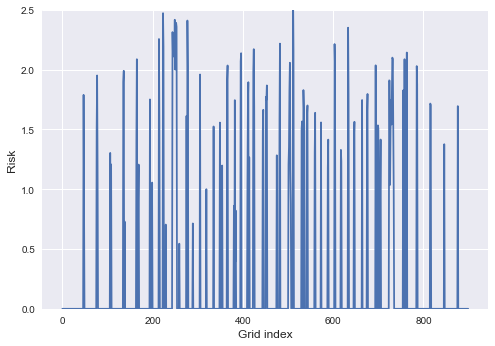

In [17]:
plt.plot(result)
plt.ylim(0, 2.5)
plt.xlabel("Grid index", size="medium")
plt.ylabel("Risk", size="medium")